# Week3 - Homework

Write a rule based predictor for the dataset below. 

Choose one of the following datasets and do your EDA. 
Test your assumptions. 

Finally write your code in `predict_one` function. 

Do __NOT__ change the function signature! This function should only take name and return `F` or `M`

In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

us_names = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/names/us_names.csv'

df = pd.read_csv(us_names)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36277 entries, 0 to 36276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    36277 non-null  object
 1   gender  36277 non-null  object
dtypes: object(2)
memory usage: 567.0+ KB


In [131]:
df.gender.value_counts()

gender
F    21789
M    14488
Name: count, dtype: int64

Not balanced! For simplicity, let's create a sub sample that will contains equal F and M.

In [133]:
min_count = min(df['gender'].value_counts())

df_f = df[df['gender'] == 'F'].sample(min_count, random_state=42)
df_m = df[df['gender'] == 'M'].sample(min_count, random_state=42)

df = pd.concat([df_f, df_m]).reset_index(drop=True)

In [135]:
df.gender.value_counts()

gender
F    14488
M    14488
Name: count, dtype: int64

In [137]:
df.head()

,name,gender
0,Brennen,F
1,Chikaima,F
2,Zoejane,F
3,Teegan,F
4,Alanda,F


## Part1:

Run experiments to select which rules are good seperator for gender.

### Predicator1: Vowel ratio > 0.4

In [139]:
# Count Vowel ratio
def vowel_ratio(name):
    vowels = 'aeiouAEIOU'
    count = sum(1 for char in name if char in vowels)
    return count / len(name) if len(name) > 0 else 0

# add new columns：vowel_ratio>40% is predicted to be female
df['vowel_ratio'] = df['name'].apply(vowel_ratio)
df['gender_prediction'] = df['vowel_ratio'].apply(lambda x: 'F' if x > 0.4 else 'M')
df['is_vowel_ratio_high'] = df['vowel_ratio'] > 0.4

In [141]:
df

,name,gender,vowel_ratio,gender_prediction,is_vowel_ratio_high
0,Brennen,F,0.285714,M,False
1,Chikaima,F,0.500000,F,True
2,Zoejane,F,0.571429,F,True
3,Teegan,F,0.500000,F,True
4,Alanda,F,0.500000,F,True
...,...,...,...,...,...
28971,Arther,M,0.333333,M,False
28972,Jamani,M,0.500000,F,True
28973,Mickeal,M,0.428571,F,True
28974,Chad,M,0.250000,M,False


<Axes: xlabel='is_vowel_ratio_high', ylabel='count'>

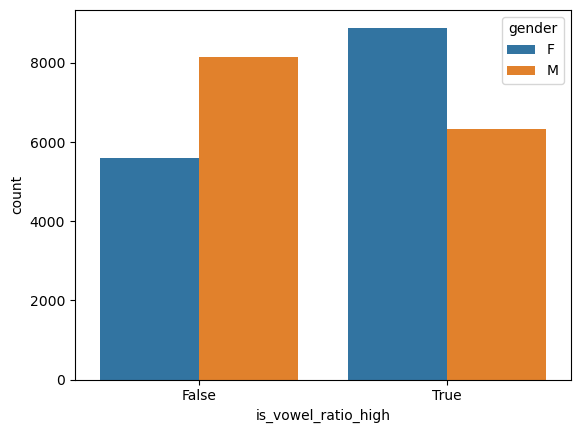

In [143]:
import seaborn as sns

sns.countplot(data = df, x = 'is_vowel_ratio_high', hue = 'gender')

It looks like Vowel ratio > 0.4 is not a good indicator for this dataset!

### Combined Predicator2: Vowel ratio > 0.4 and last_letter is vowel

In [145]:
df['is_last_letter_vowel'] = [  name[-1:] in 'aeiou' for name in df.name]
df['vowel_feature'] = (df['vowel_ratio'] > 0.4) & (df['is_last_letter_vowel'])

In [147]:
df

,name,gender,vowel_ratio,gender_prediction,is_vowel_ratio_high,is_last_letter_vowel,vowel_feature
0,Brennen,F,0.285714,M,False,False,False
1,Chikaima,F,0.500000,F,True,True,True
2,Zoejane,F,0.571429,F,True,True,True
3,Teegan,F,0.500000,F,True,False,False
4,Alanda,F,0.500000,F,True,True,True
...,...,...,...,...,...,...,...
28971,Arther,M,0.333333,M,False,False,False
28972,Jamani,M,0.500000,F,True,True,True
28973,Mickeal,M,0.428571,F,True,False,False
28974,Chad,M,0.250000,M,False,False,False


<Axes: xlabel='vowel_feature', ylabel='count'>

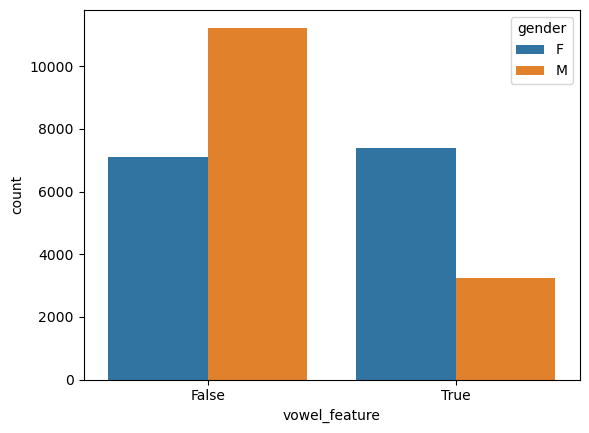

In [149]:
sns.countplot(data = df, x = 'vowel_feature', hue = 'gender')

It looks like the combined indicator: Vowel ratio > 0.4 and last letter is being a vowel is not a good indicator for this dataset either!

## Part2

Write the inference function based on the findings...

In [151]:
def predict_one(name): # <-- (Don't change the function signature) DO NOT CHANGE THIS LINE
    # write your codes below this line....
    # 1. Define vowel set
    vowels = set("aeiouAEIOU")
    
    # 2. Calculate vowel ratio
    vowel_count = sum(1 for char in name if char in vowels)
    vowel_ratio = vowel_count / len(name) if len(name) > 0 else 0

    # 3. Check if the last letter is a vowel
    is_last_letter_vowel = name[-1] in vowels

    # 4. Prediction logic:
    # - If the vowel ratio is > 40% and the last letter is a vowel, predict 'F'
    # - Otherwise, predict 'M'
    if vowel_ratio > 0.4 and is_last_letter_vowel:
        return 'F'
    else:
        return 'M'

# Test cases
print(predict_one('Jasmine'))  
print(predict_one('John'))    

F
M


In [153]:
## DO NOT CHANGE ANYTHING IN THIS CELL!!!
predictions = [ predict_one(name) for name in df.name]
accuracy = sum(df.gender == predictions) / len(df)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6428078409718387


## Part3 


Write the above function in one of the following languages:
1. javascript
2. sql

For javascript:

The following is the starter code. 

* Open a new file in week3 folder name it `name_predictor.html`

* Fill the `predictOne` function based on the function above

* Save and double click on the html file to test it.


For sql:

The following is a sample function code for postgres. 
If you don't have a database engine installed on your computer, you can use: https://onecompiler.com/

If you already have a local server, use that to create a function that contains the logic you came up with.


#### The following is the java code.

<!DOCTYPE html>
<html lang="en">

<head>
    <title>Gender Prediction</title>
    <!-- Bootstrap CSS -->
    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet">
</head>

<body class="container py-5">

    <div class="form-group">
        <label for="inputBox" class="font-weight-bold">Enter Name:</label>
        <input type="text" 
               id="inputBox" 
               class="form-control" 
               placeholder="Type name..." 
               oninput="runInference()">
    </div>
    <div id="result" class="alert alert-info mt-3">Prediction: </div>

    <script>
        function runInference() {
            const input = document.getElementById('inputBox').value;
            const prediction = predictOne(input);

            document.getElementById('result').textContent = `Prediction: ${prediction}`;
        }

        function predictOne(name) {
            // Ensure name is a valid string
            if (typeof name !== 'string' || name.trim() === '') return;

            // Normalize name to lowercase
            name = name.toLowerCase();

            // Define vowel set
            const vowels = ['a', 'e', 'i', 'o', 'u'];

            // 1. Calculate vowel count and ratio
            const vowelCount = name.split('').filter(char => vowels.includes(char)).length;
            const vowelRatio = vowelCount / name.length;

            // 2. Check if last letter is a vowel
            const isLastLetterVowel = vowels.includes(name[name.length - 1]);

            // 3. Prediction logic:
            // - If the vowel ratio is > 40% and the last letter is a vowel, predict 'F'
            // - Otherwise, predict 'M'
            if (vowelRatio > 0.4 && isLastLetterVowel) {
                return 'F';
            } else {
                return 'M';
            }
        }
    </script>

</body>

</html>


#### The following is the screenshot.

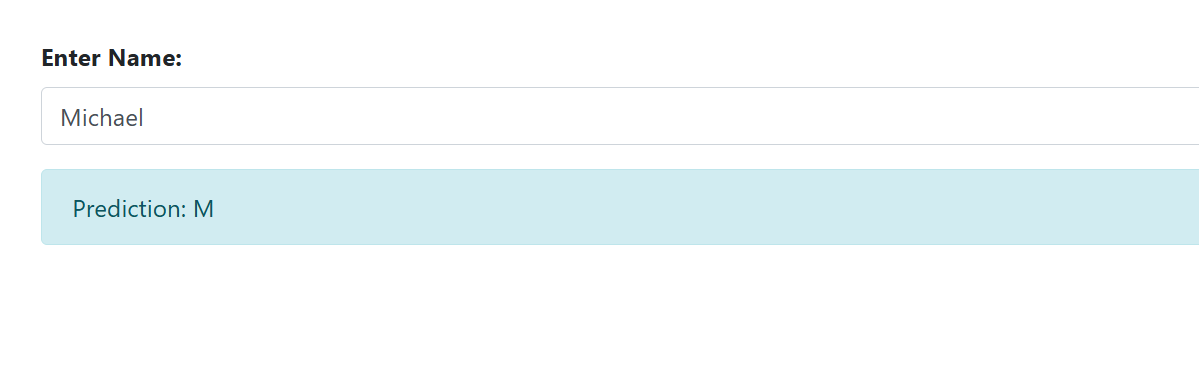